# United Kingdom "community population" COVID-19 infection percentage

references: <https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/bulletins/coronaviruscovid19infectionsurveypilot/previousReleases>

In these ONS reports, an estimate of the number of current COVID-19 infections within the "community population" is expressed. This term is stated to refer to private residential households and excludes those in hospitals, care homes and/or other institutional settings. The measurements are stated to be of testing positive for SARS-CoV-2, with or without having symptoms, on a swab taken from the nose and throat.

## some caveats

Confidence intervals, estimates of which are available in the reports, are not included. The mean of the time interval of reported measurements has been taken for plotting purposes. The timeframes of the measurements differ by region. For example, Scotland measurements were reported first in October 2020.

In [1]:
import json
import pickle
from uuid import uuid4
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['axes.labelcolor'] = (1, 1, 1, 0)
pd.set_option("display.max_rows"   , 1000)
pd.set_option("display.max_columns", 1000)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [13, 6]
sns.set()

In [3]:
df = pd.DataFrame(
         [
             ['2020-04-27', '2020-05-10', None, 'England'         ,         0.27],
             ['2020-05-25', '2020-06-07', None, 'England'         ,         0.06],
             ['2020-06-08', '2020-06-21', None, 'England'         , 100*(1/1100)],
             ['2020-07-13', '2020-07-19', None, 'England'         , 100*(1/2000)],
             ['2020-08-14', '2020-08-20', None, 'England'         , 100*(1/1900)],           
             ['2020-08-14', '2020-08-20', None, 'Wales'           , 100*(1/2800)],
             ['2020-09-04', '2020-09-10', None, 'England'         , 100*(1/900) ],
             ['2020-09-04', '2020-09-10', None, 'Wales'           , 100*(1/2000)],
             ['2020-09-13', '2020-09-19', None, 'England'         , 100*(1/500) ],
             ['2020-09-06', '2020-09-16', None, 'Northern_Ireland', 100*(1/300) ], # first reporting of Northern Ireland results in these ONS reports
             ['2020-09-13', '2020-09-19', None, 'Wales'           , 100*(1/300) ],
             ['2020-09-18', '2020-09-24', None, 'England'         , 100*(1/500) ],
             ['2020-09-11', '2020-09-24', None, 'Northern_Ireland', 100*(1/400) ],
             ['2020-09-18', '2020-09-24', None, 'Wales'           , 100*(1/500) ],
             ['2020-09-25', '2020-10-01', None, 'England'         , 100*(1/240) ],
             ['2020-09-18', '2020-10-01', None, 'Northern_Ireland', 100*(1/500) ],
             ['2020-09-25', '2020-10-01', None, 'Wales'           , 100*(1/500) ],
             ['2020-10-10', '2020-10-16', None, 'England'         , 100*(1/130) ],
             ['2020-10-03', '2020-10-16', None, 'Northern_Ireland', 100*(1/100) ],
             ['2020-10-03', '2020-10-16', None, 'Scotland'        , 100*(1/180) ], # first reporting of Scotland results in these ONS reports
             ['2020-10-10', '2020-10-16', None, 'Wales'           , 100*(1/180) ],
             ['2020-10-17', '2020-10-23', None, 'England'         , 100*(1/100) ],
             ['2020-10-17', '2020-10-23', None, 'Northern_Ireland', 100*(1/80)  ],
             ['2020-10-10', '2020-10-23', None, 'Scotland'        , 100*(1/140) ],
             ['2020-10-17', '2020-10-23', None, 'Wales'           , 100*(1/120) ],
             ['2020-10-25', '2020-10-31', None, 'England'         , 100*(1/90)  ],
             ['2020-10-25', '2020-10-31', None, 'Northern_Ireland', 100*(1/75)  ],
             ['2020-10-25', '2020-10-31', None, 'Scotland'        , 100*(1/110) ],
             ['2020-10-25', '2020-10-31', None, 'Wales'           , 100*(1/110) ],
         ],
         columns = [
             'datetime_start',
             'datetime_stop',
             'datetime_mean',
             'region',
             'community_population_estimated_percentage_infected',
         ]
    )
df['datetime_start'] = pd.to_datetime(df['datetime_start'])
df['datetime_stop']  = pd.to_datetime(df['datetime_stop'])
df['datetime_mean']  = df['datetime_start']+(df['datetime_stop']-df['datetime_start'])/2

,datetime_start,datetime_stop,datetime_mean,region,community_population_estimated_percentage_infected
19,2020-10-03,2020-10-16,2020-10-09 12:00:00,Scotland,0.555556
23,2020-10-10,2020-10-23,2020-10-16 12:00:00,Scotland,0.714286
27,2020-10-25,2020-10-31,2020-10-28 00:00:00,Scotland,0.909091


,datetime_start,datetime_stop,datetime_mean,region,community_population_estimated_percentage_infected
5,2020-08-14,2020-08-20,2020-08-17,Wales,0.035714
7,2020-09-04,2020-09-10,2020-09-07,Wales,0.050000
10,2020-09-13,2020-09-19,2020-09-16,Wales,0.333333
13,2020-09-18,2020-09-24,2020-09-21,Wales,0.200000
16,2020-09-25,2020-10-01,2020-09-28,Wales,0.200000
20,2020-10-10,2020-10-16,2020-10-13,Wales,0.555556
24,2020-10-17,2020-10-23,2020-10-20,Wales,0.833333
28,2020-10-25,2020-10-31,2020-10-28,Wales,0.909091


,datetime_start,datetime_stop,datetime_mean,region,community_population_estimated_percentage_infected
0,2020-04-27,2020-05-10,2020-05-03 12:00:00,England,0.270000
1,2020-05-25,2020-06-07,2020-05-31 12:00:00,England,0.060000
2,2020-06-08,2020-06-21,2020-06-14 12:00:00,England,0.090909
3,2020-07-13,2020-07-19,2020-07-16 00:00:00,England,0.050000
4,2020-08-14,2020-08-20,2020-08-17 00:00:00,England,0.052632
6,2020-09-04,2020-09-10,2020-09-07 00:00:00,England,0.111111
8,2020-09-13,2020-09-19,2020-09-16 00:00:00,England,0.200000
11,2020-09-18,2020-09-24,2020-09-21 00:00:00,England,0.200000
14,2020-09-25,2020-10-01,2020-09-28 00:00:00,England,0.416667
17,2020-10-10,2020-10-16,2020-10-13 00:00:00,England,0.769231


,datetime_start,datetime_stop,datetime_mean,region,community_population_estimated_percentage_infected
9,2020-09-06,2020-09-16,2020-09-11 00:00:00,Northern_Ireland,0.333333
12,2020-09-11,2020-09-24,2020-09-17 12:00:00,Northern_Ireland,0.250000
15,2020-09-18,2020-10-01,2020-09-24 12:00:00,Northern_Ireland,0.200000
18,2020-10-03,2020-10-16,2020-10-09 12:00:00,Northern_Ireland,1.000000
22,2020-10-17,2020-10-23,2020-10-20 00:00:00,Northern_Ireland,1.250000
26,2020-10-25,2020-10-31,2020-10-28 00:00:00,Northern_Ireland,1.333333


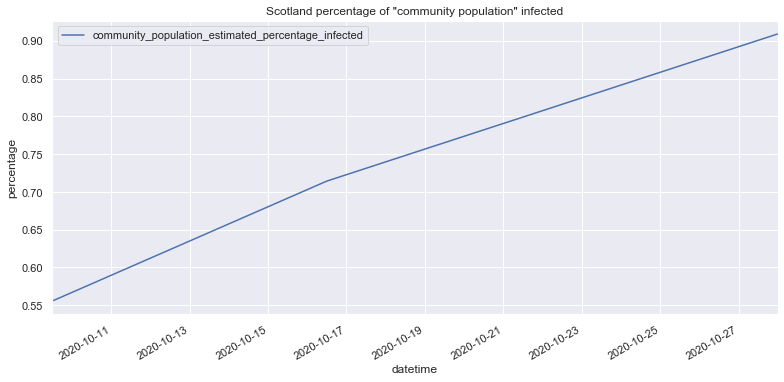

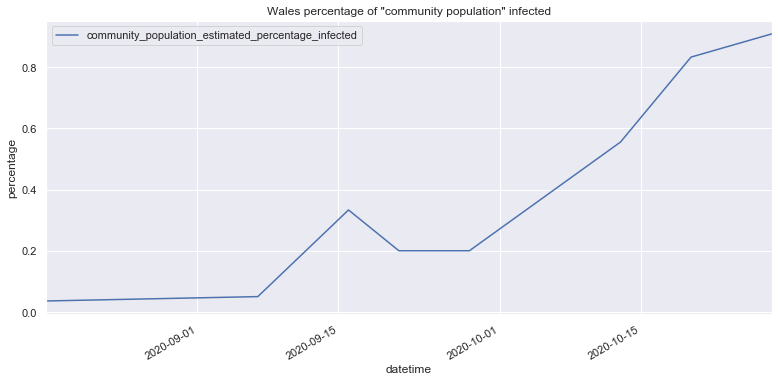

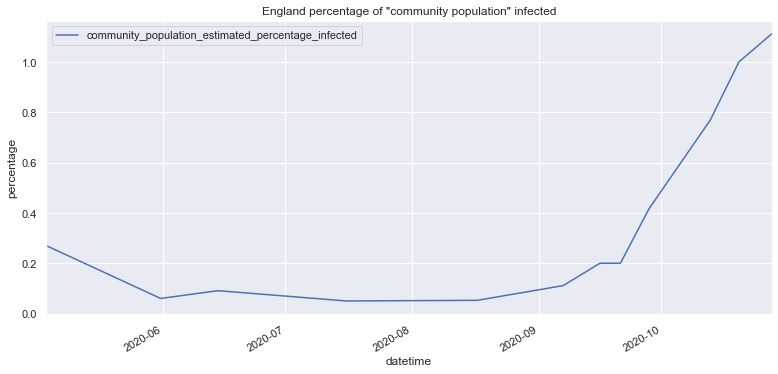

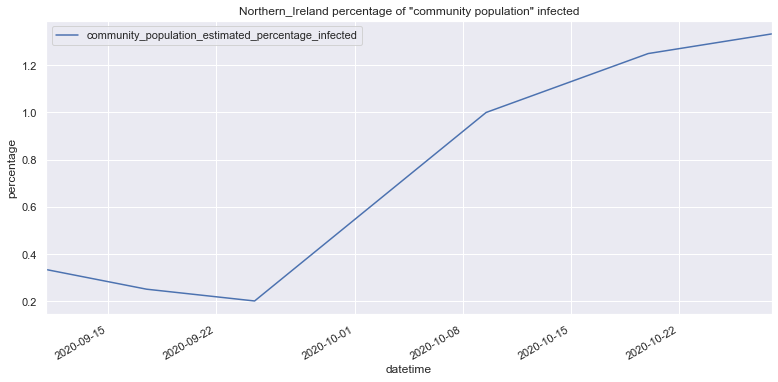

In [4]:
for region in list(set(df['region'].values)):
    # table for region
    display(df.query('region==@region'))
    # plot for region
    _df           = df.query('region==@region')
    df_plot       = _df[['community_population_estimated_percentage_infected']]
    df_plot.index = _df['datetime_mean']
    #df_plot.plot(title=region+' percentage of "community population" infected').legend(loc='center left', bbox_to_anchor=(1.0, 0.5)); plt.xlabel('datetime'); plt.ylabel('percentage');
    df_plot.plot(title=region+' percentage of "community population" infected'); plt.xlabel('datetime'); plt.ylabel('percentage');